In [2]:
import pandas as pd
import os

In [43]:
icategories = pd.read_csv("./data/archive/item_categories_en.csv")
items = pd.read_csv("./data/archive/items_en.csv")
shops = pd.read_csv("./data/archive/shops_en.csv")
train = pd.read_csv("./data/archive/sales_train.csv")
test = pd.read_csv("./data/archive/test.csv")
sample = pd.read_csv("./data/archive/sample_submission.csv")


In [44]:
#icategories.head()
#items.head()
#shops.head()

In [46]:
print("item_categories:", icategories.shape)
print("items:", items.shape)
print("shops:", shops.shape)
print("train:", train.shape)
print("test:", test.shape)
print("sample:", sample.shape)

item_categories: (84, 2)
items: (22170, 3)
shops: (60, 2)
train: (2935849, 6)
test: (214200, 3)
sample: (214200, 2)


In [49]:
print(train.columns)
print(train.dtypes)

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object
Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')


In [51]:
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y")


In [53]:
train["item_cnt_day"].describe()


count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [55]:
#Devoluciones/Cancelaciones
(train["item_cnt_day"] < 0).sum()


np.int64(7356)

In [57]:
train["item_price"].describe()


count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

In [59]:
train["item_price"].sort_values(ascending=False).head(10)


1163158    307980.0
885138      59200.0
1488135     50999.0
2327159     49782.0
2917760     42990.0
2931380     42990.0
2885692     42990.0
2910156     42990.0
1006638     42000.0
2910155     41990.0
Name: item_price, dtype: float64

<Axes: title={'center': 'Ventas Mensuales Totales'}, xlabel='date_block_num'>

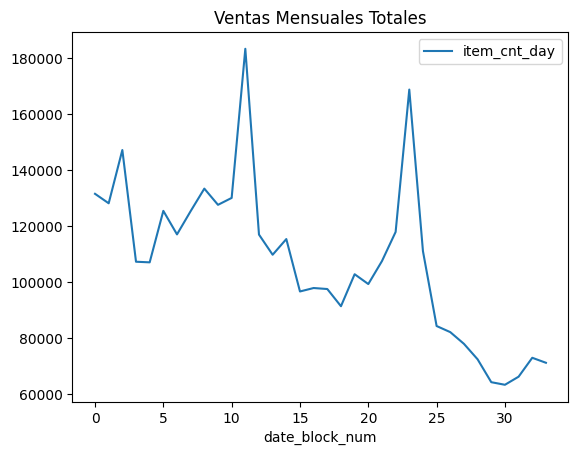

In [63]:
ventas_mensuales = (
    train
    .groupby("date_block_num", as_index=False)["item_cnt_day"]
    .sum()
)

ventas_mensuales.plot(
    x="date_block_num",
    y="item_cnt_day",
    title="Ventas Mensuales Totales"
)
